# Random walk statistics

To simulate and analyze various types of random walks on the lattice in the plane (all steps are of the same length $d = 1$, but the direction is randomly chosen from a certain set of prescribed possibilities). Using $N_w > 500$ random walks of n steps starting at the origin determine the mean Euclidean distance $R$ after $n$ steps together with its standard deviation. Plot the dependence of the mean distance (including error bars given by the standard deviation) on the number of steps $n$. Check that for all walks this dependence is of the form

$$
R(n) = c n^{\alpha}.                                                        
$$

where $\alpha \in (0, 1)$. Determine the constant c and the exponent α by the least-square fitting (you
can use e.g. the built-in function fit in Gnuplot) of the logarithm of the equation (1)

$$
\log(R) = \log(c) + \alpha \log(n).                                                
$$

In [21]:
from pathlib import Path 

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

plt.style.use('seaborn-whitegrid')

output_path = Path("../output") 

## Read data

Read data from CSV file wher columns are number of steps, average distance, standard deviation. Plot the  power law with errors and log-log plot with linear fit.  

In [37]:
data = pd.read_csv("../output/data.csv", sep=",", usecols=["N", "R", "E"], header=0)
X, Y, E = data["N"], data["R"], data["E"]

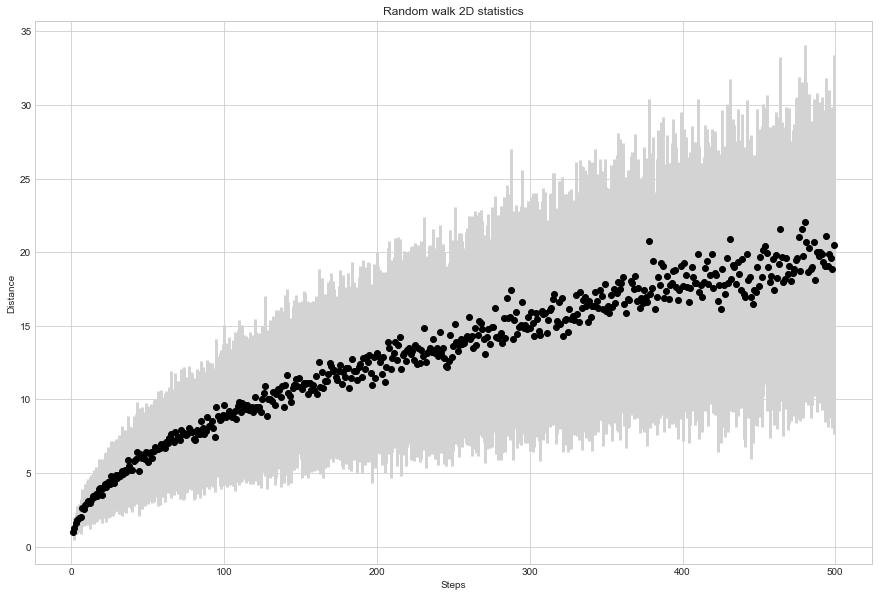

In [38]:
plt.figure(figsize=(15, 10))

plt.errorbar(X, Y, yerr=E, fmt='o', color='black', ecolor='lightgray', elinewidth=3, capsize=0)

plt.xlabel("Steps")
plt.ylabel("Distance")
plt.title("Random walk 2D statistics")

plt.savefig(output_path / "RandomWalk2DStatistics1.png")
plt.show()

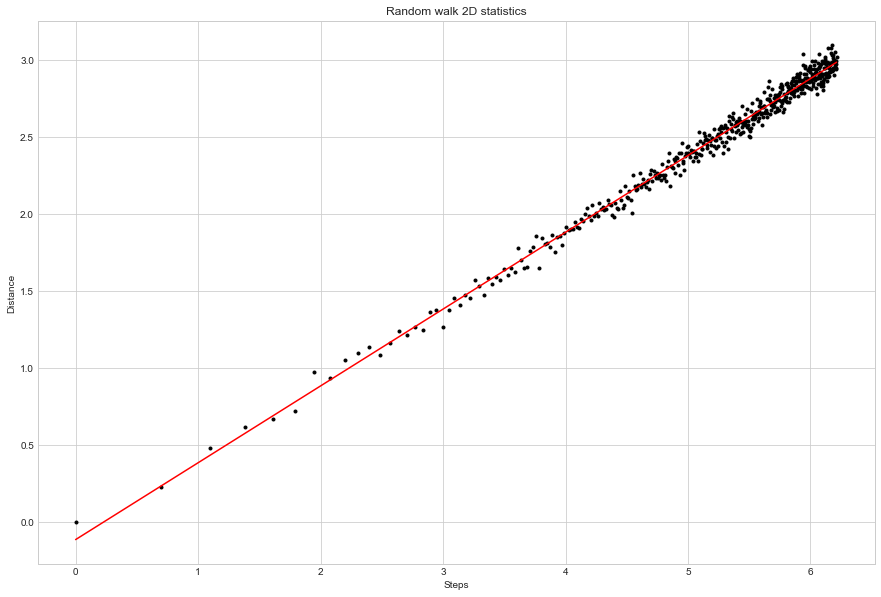

In [39]:
plt.figure(figsize=(15, 10))

plt.plot(np.log(X), np.log(Y), "k.")

m, b = np.polyfit(np.log(X), np.log(Y), 1)
plt.plot(np.log(X), m * np.log(X) + b,  "r-")

plt.xlabel("Steps")
plt.ylabel("Distance")
plt.title("Random walk 2D statistics")

plt.savefig(output_path / "RandomWalk2DStatistics2.png")
plt.show()


In [40]:
slope = np.polyfit(np.log(X),np.log(Y),1)[0]

print(f"The slope aka `alpha` paramater is {slope:.1f}.")

The slope aka `alpha` paramater is 0.5.


It means that $\alpha$ is square root in the original equation $R = c n^{\alpha} = c \sqrt{n}$. 